<a href="https://colab.research.google.com/github/nedokormysh/GB_intro_Analysis_Healthcare/blob/lesson_2/GB_intro_Healthcare_Analysis_hw_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Задание.**

Задание на ознакомление с датасетом TCGA — сделать описательную статистику нескольких переменных на выбор, выяснить возможный источник выбранных признаков и взаимосвязь с целевой переменной.

Архив можно распаковать в Google Colab с помощью !tar xzf
Домашнее задание предоставляется в виде Google Colab Notebook.

In [ ]:
# !tar -xvf "/content/clinical.project-tcga-dlbc.2023-09-20.tar.gz"

In [ ]:
!pip install phik -q
!pip install association-metrics -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import association_metrics as am

import warnings
warnings.filterwarnings("ignore")

Распакуем архив в гит и будем использовать данные уже из гита.

In [ ]:
PATH = 'https://raw.githubusercontent.com/nedokormysh/GB_intro_Analysis_Healthcare/lesson_2/datasets/'

In [ ]:
DATASETS_NAMES = ['clinical.tsv', 'exposure.tsv', 'family_history.tsv', 'follow_up.tsv', 'pathology_detail.tsv']

In [ ]:
clinical, exposure, family_history, follow_up, pathology_detail = [pd.read_csv(PATH+f'{i}', sep='\t') for i in DATASETS_NAMES]
datasets = clinical, exposure, family_history, follow_up, pathology_detail

# Общий анализ датасетов.

Посмотрим краткую информацию о датасетах.

In [ ]:
for i in range(len(datasets)):
    name = DATASETS_NAMES[i].split('.')[0]
    print(f'Датасет: \033[1m{name}\033[0m')
    print(f'Размер датасета: {datasets[i].shape}')
    print('Есть пропуски!\n') if datasets[i].isna().any().any() else print('Пропусков нет\n')
    display(datasets[i].sample(3)) if len(datasets[i]) > 0 else print('В датасете ничего нет')
    print('\n')
    if len(datasets[i]) > 0:
        display(datasets[i].nunique())

    print('-'*300)

Датасет: clinical
Размер датасета: (106, 158)
Пропусков нет



,case_id,case_submitter_id,project_id,age_at_index,age_is_obfuscated,cause_of_death,cause_of_death_source,country_of_residence_at_enrollment,days_to_birth,days_to_death,...,treatment_arm,treatment_dose,treatment_dose_units,treatment_effect,treatment_effect_indicator,treatment_frequency,treatment_intent_type,treatment_or_therapy,treatment_outcome,treatment_type
44,67325322-483f-443f-9ffa-2a20d108a2fb,TCGA-FF-8046,TCGA-DLBC,51,'--,'--,'--,'--,-18853,'--,...,'--,'--,'--,'--,'--,'--,'--,yes,'--,"Pharmaceutical Therapy, NOS"
99,f855dad1-6ffc-493e-ba6c-970874bc9210,TCGA-GR-A4D5,TCGA-DLBC,46,'--,'--,'--,'--,-17023,'--,...,'--,'--,'--,'--,'--,'--,'--,no,'--,"Radiation Therapy, NOS"
15,1f971af1-6772-4fe6-8d35-bbe527a037fe,TCGA-FF-8041,TCGA-DLBC,28,'--,'--,'--,'--,-10466,'--,...,'--,'--,'--,'--,'--,'--,'--,no,'--,"Radiation Therapy, NOS"


case_id                  58
case_submitter_id        58
project_id                1
age_at_index             35
age_is_obfuscated         1
                         ..
treatment_frequency       1
treatment_intent_type     1
treatment_or_therapy      4
treatment_outcome         1
treatment_type            3
Length: 158, dtype: int64

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Датасет: exposure
Размер датасета: (48, 35)
Пропусков нет



,case_id,case_submitter_id,project_id,age_at_onset,alcohol_days_per_week,alcohol_drinks_per_day,alcohol_history,alcohol_intensity,alcohol_type,asbestos_exposure,...,smoking_frequency,time_between_waking_and_first_smoke,tobacco_smoking_onset_year,tobacco_smoking_quit_year,tobacco_smoking_status,tobacco_use_per_day,type_of_smoke_exposure,type_of_tobacco_used,weight,years_smoked
31,c3d662ee-48d0-454a-bb0c-77d3338d3747,TCGA-GR-7353,TCGA-DLBC,'--,'--,'--,Not Reported,'--,'--,'--,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
8,25ff86af-beb4-480c-b706-f3fe0306f7cf,TCGA-RQ-A68N,TCGA-DLBC,'--,'--,'--,Not Reported,'--,'--,'--,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
45,f8cf647b-1447-4ac3-8c43-bef07765cabf,TCGA-G8-6326,TCGA-DLBC,'--,'--,'--,Not Reported,'--,'--,'--,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--


case_id                                   48
case_submitter_id                         48
project_id                                 1
age_at_onset                               1
alcohol_days_per_week                      1
alcohol_drinks_per_day                     1
alcohol_history                            1
alcohol_intensity                          1
alcohol_type                               1
asbestos_exposure                          1
bmi                                        1
cigarettes_per_day                         1
coal_dust_exposure                         1
environmental_tobacco_smoke_exposure       1
exposure_duration                          1
exposure_duration_years                    1
exposure_type                              1
height                                     1
marijuana_use_per_week                     1
pack_years_smoked                          1
parent_with_radiation_exposure             1
radon_exposure                             1
respirable

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Датасет: family_history
Размер датасета: (0, 9)
Пропусков нет

В датасете ничего нет


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Датасет: follow_up
Размер датасета: (0, 112)
Пропусков нет

В датасете ничего нет


-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Фактически из 5 предоставленных датасетов информация есть только в двух. И достаточно много колонок с пропущенной информацией или с данными, где у нас во всех строках одна и та же информация. Для возможного построения модели эти данные нам не информативны.

Не будем рассматривать колонки, где количество уникальных значений равно 1.

In [ ]:
clinical_info_lst = [i for i in clinical.columns if clinical[i].nunique() != 1]
clinical_info = clinical[clinical_info_lst]

exposure_info_lst = [i for i in exposure.columns if exposure[i].nunique() != 1]
exposure_info = exposure[exposure_info_lst]

In [ ]:
# приведём написание данных в разных колонках к одному варианту + заменим пропуски на nan
clinical_info = clinical_info.replace("no", 'No')
clinical_info = clinical_info.replace("yes", 'Yes')
clinical_info = clinical_info.replace("'--", np.nan)
clinical_info.head(2)

,case_id,case_submitter_id,age_at_index,days_to_birth,days_to_death,ethnicity,gender,race,vital_status,year_of_birth,...,prior_malignancy,prior_treatment,progression_or_recurrence,site_of_resection_or_biopsy,synchronous_malignancy,tissue_or_organ_of_origin,tumor_grade,year_of_diagnosis,treatment_or_therapy,treatment_type
0,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,TCGA-FA-A7Q1,61,-22454,248,not hispanic or latino,female,asian,Dead,1952,...,No,No,not reported,Intra-abdominal lymph nodes,No,Intra-abdominal lymph nodes,not reported,2013,Yes,"Pharmaceutical Therapy, NOS"
1,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,TCGA-FA-A7Q1,61,-22454,248,not hispanic or latino,female,asian,Dead,1952,...,No,No,not reported,Intra-abdominal lymph nodes,No,Intra-abdominal lymph nodes,not reported,2013,No,"Radiation Therapy, NOS"


In [ ]:
exposure_info.head(2)

,case_id,case_submitter_id
0,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,TCGA-FA-A7Q1
1,0bf573ac-cd1e-42d8-90cf-b30d7b08679c,TCGA-FA-A6HN


Объединять датасеты не имеет смысла, т.к. фактически информация из exposure совпадает с информацией из clinical. Таким образом будем работать с clinical_info.

In [ ]:
clinical_info.duplicated().any(), exposure_info.duplicated().any()

(False, False)

Фактически у нас есть дубли, т.к. для одного и того же case_id у нас 2 записи treatment_type: pharmaceutical и radiation. А также колонка treatment_therapy - в которой указывается проводилось ли лечение.

Добавим пару новых столбцов. Они будут показывать производился ли определённый тип лечения.

In [ ]:
clinical_info.treatment_type.unique()

array(['Pharmaceutical Therapy, NOS', 'Radiation Therapy, NOS', nan],
      dtype=object)

In [ ]:
clinical_info['treatment_Radiation'] = np.nan
clinical_info['treatment_Pharmaceutical'] = np.nan

In [ ]:
def therapy_reaction(row):
    if row['treatment_type'] == 'Pharmaceutical Therapy, NOS':
        row['treatment_Pharmaceutical'] = row['treatment_or_therapy']
    elif row['treatment_type'] == 'Radiation Therapy, NOS':
        row['treatment_Radiation'] = row['treatment_or_therapy']

    return row

clinical_info = clinical_info.apply(therapy_reaction, axis=1)

case_submitter_id - это тоже некоторое id. Не будем его рассматривать. Удалим строки, где информация во всех столбцах отсутствует.

In [ ]:
clinical_info = clinical_info.drop(['treatment_or_therapy',	'treatment_type', 'case_submitter_id'], axis=1)

In [ ]:
clinical_info.shape

(106, 31)

In [ ]:
clinical_info.set_index('case_id', inplace=True)
clinical_info.dropna(axis=0, how='all', inplace=True)
clinical_info.reset_index(drop=False, inplace=True )
clinical_info.shape

(96, 31)

10 строк оказались полностью пустыми и неинформативными.

In [ ]:
# запишем информацию о проводившихся типах лечения в одну из дублирующих строк
for i in range(0, len(clinical_info)):
    if i % 2 == 0:
        clinical_info.loc[i][['treatment_Radiation', 'treatment_Pharmaceutical']] = clinical_info.loc[i][['treatment_Radiation', 'treatment_Pharmaceutical']].fillna(clinical_info.loc[i+1][['treatment_Radiation', 'treatment_Pharmaceutical']])

In [ ]:
# clinical_info.head(3)

In [ ]:
clinical_info_thinned = clinical_info.iloc[::2]
clinical_info_thinned.head(3)

,case_id,age_at_index,days_to_birth,days_to_death,ethnicity,gender,race,vital_status,year_of_birth,year_of_death,...,prior_malignancy,prior_treatment,progression_or_recurrence,site_of_resection_or_biopsy,synchronous_malignancy,tissue_or_organ_of_origin,tumor_grade,year_of_diagnosis,treatment_Radiation,treatment_Pharmaceutical
0,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,61,-22454,248,not hispanic or latino,female,asian,Dead,1952,NaN,...,No,No,not reported,Intra-abdominal lymph nodes,No,Intra-abdominal lymph nodes,not reported,2013,No,Yes
2,0bf573ac-cd1e-42d8-90cf-b30d7b08679c,73,-27025,58,not hispanic or latino,male,asian,Dead,1940,NaN,...,No,No,not reported,"Lymph nodes of head, face and neck",No,"Lymph nodes of head, face and neck",not reported,2013,No,Yes
4,0e251c03-bf86-4ed8-b45d-3cbc97160502,27,-10075,391,hispanic or latino,female,white,Dead,1984,2012,...,No,No,not reported,"Lymph nodes of head, face and neck",No,"Lymph nodes of head, face and neck",not reported,2011,No,Yes


Получили прореженный датасет, без дублирующих строк.

# EDA

Отфильтруем колонки с единственным значением после всех преобразований.

In [ ]:
clinical_info_thinned_lst = [i for i in clinical_info_thinned.columns if clinical_info_thinned[i].nunique() != 1]
clinical_info_thinned = clinical_info_thinned[clinical_info_thinned_lst]

In [ ]:
clinical_info_thinned.shape

(48, 22)

Осталось малое количество записей.

In [ ]:
clinical_info_thinned.columns

Index(['case_id', 'age_at_index', 'days_to_birth', 'days_to_death',
       'ethnicity', 'gender', 'race', 'vital_status', 'year_of_birth',
       'year_of_death', 'age_at_diagnosis', 'ann_arbor_b_symptoms',
       'ann_arbor_clinical_stage', 'ann_arbor_extranodal_involvement',
       'days_to_last_follow_up', 'icd_10_code', 'prior_treatment',
       'site_of_resection_or_biopsy', 'tissue_or_organ_of_origin',
       'year_of_diagnosis', 'treatment_Radiation', 'treatment_Pharmaceutical'],
      dtype='object')

In [ ]:
continuous_features = ['age_at_index', 'days_to_birth', 'days_to_death',
                       'year_of_birth', 'year_of_death', 'age_at_diagnosis',
                       'days_to_last_follow_up', 'year_of_diagnosis']

categorical_features = [i for i in clinical_info_thinned.columns if i not in continuous_features]

In [ ]:
# clinical_info_thinned.info()

In [ ]:
# числовые признаки приведём к типу float, категориальные - к category
for el in continuous_features:
    clinical_info_thinned[el] = clinical_info_thinned[el].astype('float')

for el in categorical_features:
    clinical_info_thinned[el] = clinical_info_thinned[el].astype('category')

## Числовые признаки.

### Краткое описание числовых характеристик

In [ ]:
clinical_info_thinned[continuous_features].describe()

,age_at_index,days_to_birth,days_to_death,year_of_birth,year_of_death,age_at_diagnosis,days_to_last_follow_up,year_of_diagnosis
count,48.000000,48.000000,9.000000,48.000000,5.000000,48.000000,43.000000,48.000000
mean,56.270833,-20731.354167,1504.777778,1952.875000,2007.600000,20731.354167,1274.372093,2009.145833
std,13.947835,5107.471500,2129.076665,15.172238,4.929503,5107.471500,1315.464195,5.031770
min,23.000000,-30256.000000,58.000000,1923.000000,2001.000000,8493.000000,0.000000,1987.000000
25%,46.000000,-24607.750000,313.000000,1941.000000,2004.000000,16998.250000,441.500000,2009.000000
50%,57.500000,-21146.500000,595.000000,1951.500000,2009.000000,21146.500000,832.000000,2011.000000
75%,67.000000,-16998.250000,1252.000000,1963.250000,2012.000000,24607.750000,1581.000000,2012.000000
max,82.000000,-8493.000000,6425.000000,1987.000000,2012.000000,30256.000000,5980.000000,2013.000000


Каких-то явных выпадающих значений не наблюдаем.

array([[<Axes: title={'center': 'age_at_index'}>,
        <Axes: title={'center': 'days_to_birth'}>,
        <Axes: title={'center': 'days_to_death'}>,
        <Axes: title={'center': 'year_of_birth'}>],
       [<Axes: title={'center': 'year_of_death'}>,
        <Axes: title={'center': 'age_at_diagnosis'}>,
        <Axes: title={'center': 'days_to_last_follow_up'}>,
        <Axes: title={'center': 'year_of_diagnosis'}>]], dtype=object)

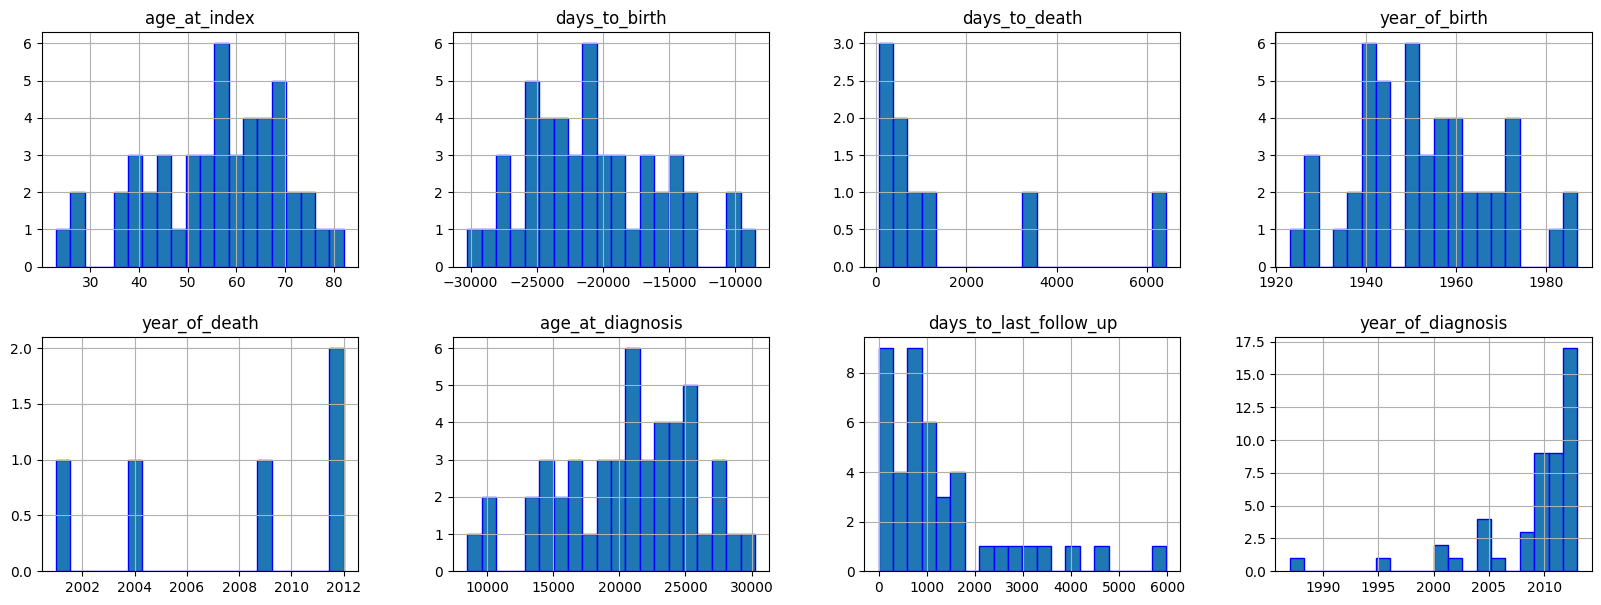

In [ ]:
clinical_info_thinned[continuous_features].hist(layout=(-1, 4), figsize=(20, 7), bins=20, edgecolor='b')

Отметим, что количество дней до дня рождения является отрицательным числом. Возраст постановки диагноза вероятно высчитывается в днях. При этом возраст попадания в базу измеряется в годах. В нашей выборке нет подростков и детей (< 18 лет).

Для обучения модели признаки необходимо масштабировать.

**Предположим, что целевой переменной является vital_status, т.е. жив человек или мёртв.**

### age_at_index

Вероятно возраст, в котором пациент попал в данную базу.

Text(0.5, 0, 'age_at_index')

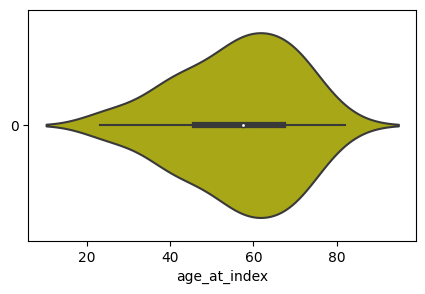

In [ ]:
plt.figure(figsize=(5,3))
sns.violinplot(clinical_info_thinned['age_at_index'], orient='h', color='y')
plt.xlabel('age_at_index')

Каких-то явных выбросов не наблюдается. Рассмотрим распределение. Также подсветим жив человек или нет.

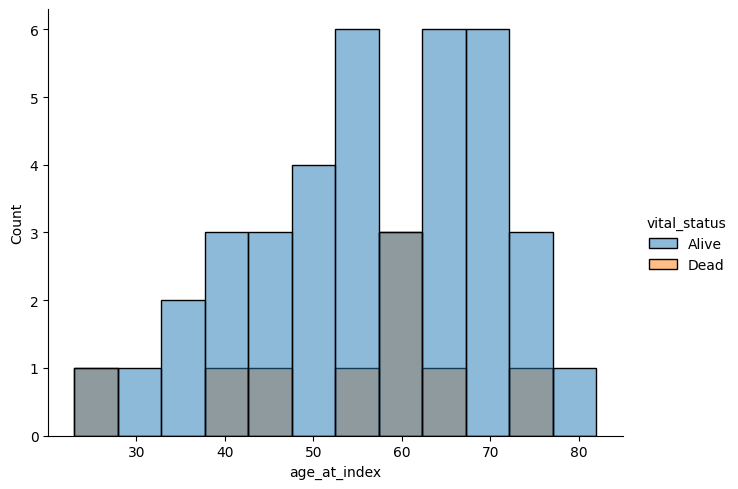

In [ ]:
sns.displot(data=clinical_info_thinned,
            x=clinical_info_thinned['age_at_index'],
            legend=True,
            aspect=1.3,
            bins=12,
            hue=clinical_info_thinned['vital_status'],
            kind='hist',
            # kde=True
            )

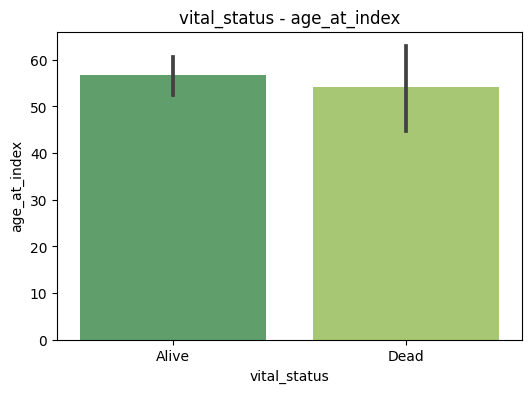

In [ ]:
plt.figure(figsize=(6,4))

sns.barplot(data=clinical_info_thinned,
            x='vital_status',
            y='age_at_index',
            palette='summer')
plt.title('vital_status - age_at_index')
plt.show();

Средний возраст умерших и живущих людей достаточно близок. Доверительный интервал у умерших больше.

In [ ]:
# temp_ = clinical_info_thinned.groupby(['age_at_index', 'vital_status']).agg(Count=('age_at_index', 'count'))
# temp_

### days_to_birth

Предполагаю, что фактически это возраст в днях в момент постановки диагноза (или индексирования в базу). И считается он в отрицательную область. Должна быть отрицательная корреляция этого признака и возраста.

Text(0.5, 0, 'days_to_birth')

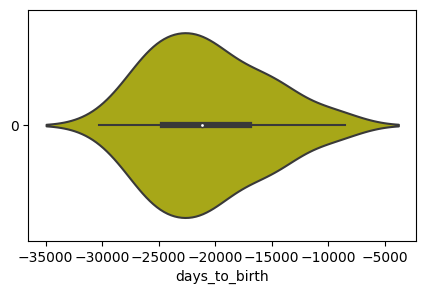

In [ ]:
plt.figure(figsize=(5,3))
sns.violinplot(clinical_info_thinned['days_to_birth'], orient='h', color='y')
plt.xlabel('days_to_birth')

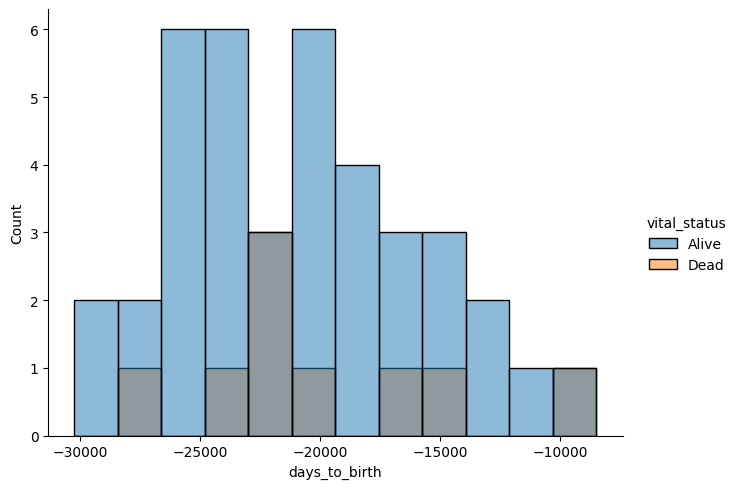

In [ ]:
sns.displot(data=clinical_info_thinned,
            x=clinical_info_thinned['days_to_birth'],
            legend=True,
            aspect=1.3,
            bins=12,
            hue=clinical_info_thinned['vital_status'],
            kind='hist',
            # kde=True
            )

In [ ]:
print(f'\033[1mКоэффициент корреляции\033[0m  = ', round(np.corrcoef(clinical_info_thinned['days_to_birth'], clinical_info_thinned['age_at_index'])[0][1], 5))

Коэффициент корреляции  =  -0.99984


Да, имеем большую корреляцию. Если бы обучали модель, то можно было бы каким-либо признаком пренебречь.

### days_to_death

Text(0.5, 0, 'days_to_death')

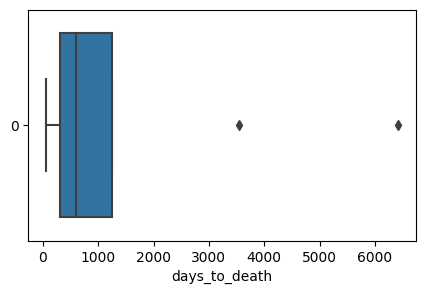

In [ ]:
plt.figure(figsize=(5,3))
sns.boxplot(clinical_info_thinned['days_to_death'], orient='h')
plt.xlabel('days_to_death')

Здесь наблюдаются люди с очень сильными отклонениями по количеству дней до смерти.

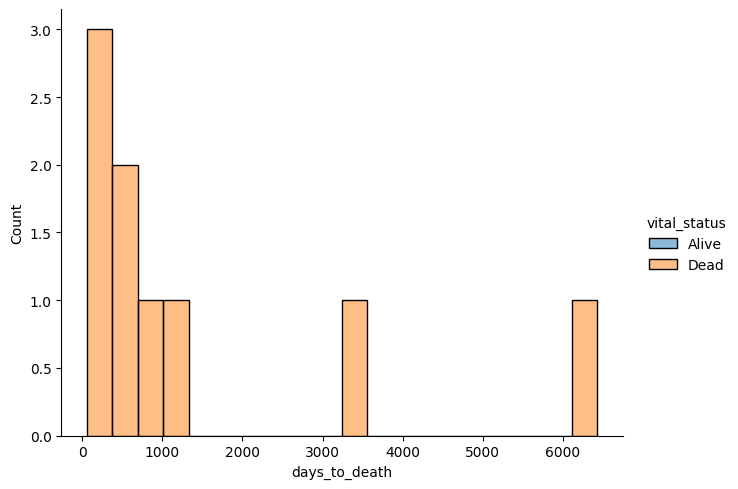

In [ ]:
sns.displot(data=clinical_info_thinned,
            x=clinical_info_thinned['days_to_death'],
            legend=True,
            aspect=1.3,
            bins=20,
            hue=clinical_info_thinned['vital_status'],
            kind='hist')

Очевидный результат, что данный признак будет отражать только тех, кто умер. Впрочем, видно, что ошибочных данных по этому признаку у нас нет.

Но главная проблема, у нас в нашей выборке очень малое количество данных по умершим.

In [ ]:
len(clinical_info_thinned[clinical_info_thinned['vital_status'] == 'Dead'])#[['vital_status','days_to_death']]

9

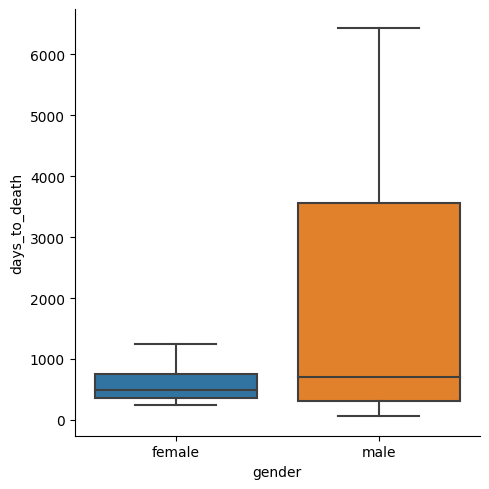

In [ ]:
sns.catplot(data=clinical_info_thinned,
            x="gender",
            y="days_to_death",
            kind="box")

In [ ]:
clinical_info_thinned[(clinical_info_thinned['vital_status'] == 'Dead') & (clinical_info_thinned['days_to_death'] > 3000)][['year_of_diagnosis', 'days_to_death', 'gender']]

,year_of_diagnosis,days_to_death,gender
28,1987.0,6425.0,male
50,2002.0,3553.0,male


Два человека, которые жили намного дольше медианного значения - мужчины. Это влияет на взаимосвязи между переменными.

### year_of_birth

Text(0.5, 0, 'year_of_birth')

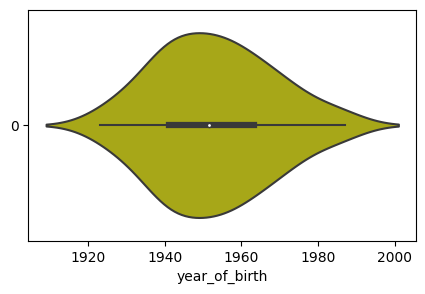

In [ ]:
plt.figure(figsize=(5,3))
sns.violinplot(clinical_info_thinned['year_of_birth'], orient='h', color='y')
plt.xlabel('year_of_birth')

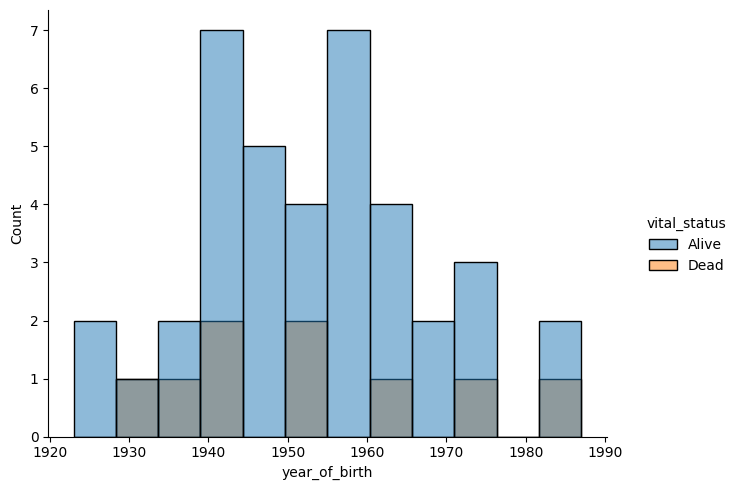

In [ ]:
sns.displot(data=clinical_info_thinned,
            x=clinical_info_thinned['year_of_birth'],
            legend=True,
            aspect=1.3,
            bins=12,
            hue=clinical_info_thinned['vital_status'],
            kind='hist')

In [ ]:
# clinical_info_thinned['year_of_birth'].value_counts()

### year_of_death

Text(0.5, 0, 'year_of_death')

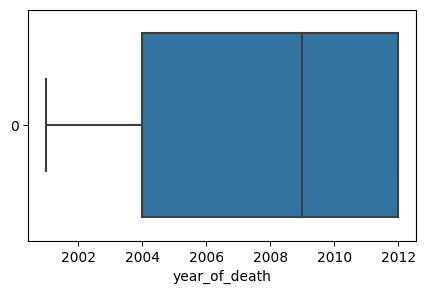

In [ ]:
plt.figure(figsize=(5,3))
sns.boxplot(clinical_info_thinned['year_of_death'], orient='h')
plt.xlabel('year_of_death')

In [ ]:
clinical_info_thinned['year_of_death'].unique()

array([  nan, 2012., 2001., 2004., 2009.])

По большей части год смерти нам неизвестен. Если бы строил модель, то думаю, что данный признак нужно было бы удалять.

### age_at_diagnosis

Возраст постановки диагноза.

Text(0.5, 0, 'age_at_diagnosis')

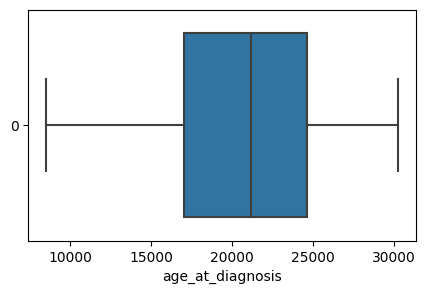

In [ ]:
plt.figure(figsize=(5,3))
sns.boxplot(clinical_info_thinned['age_at_diagnosis'], orient='h')
plt.xlabel('age_at_diagnosis')

In [ ]:
print(f'\033[1mКоэффициент корреляции\033[0m  = ', round(np.corrcoef(clinical_info_thinned['age_at_diagnosis'], clinical_info_thinned['age_at_index'])[0][1], 5))

Коэффициент корреляции  =  0.99984


Здесь линейная взаимосвязь присутствует между возрастом постановки диагноза и возрастом индексации.

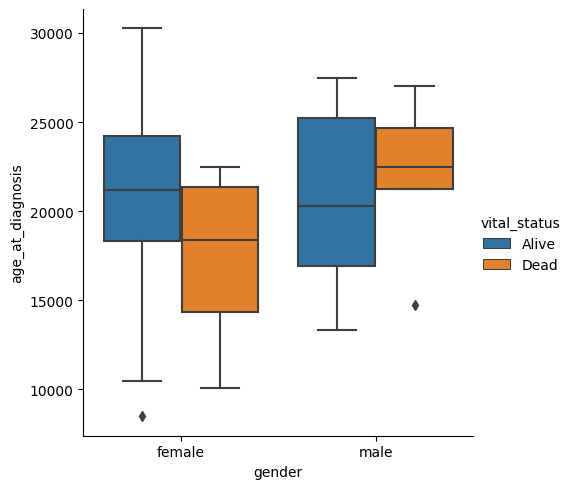

In [ ]:
sns.catplot(data=clinical_info_thinned,
            x="gender",
            y="age_at_diagnosis",
            hue='vital_status',
            kind="box")

Вероятно мужчины позже проводят диагностику.


### days_to_last_follow_up

Количество дней от последнего обследования.

Text(0.5, 0, 'days_to_last_follow_up')

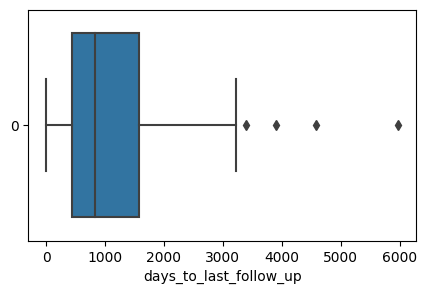

In [ ]:
plt.figure(figsize=(5,3))
sns.boxplot(clinical_info_thinned['days_to_last_follow_up'], orient='h')
plt.xlabel('days_to_last_follow_up')

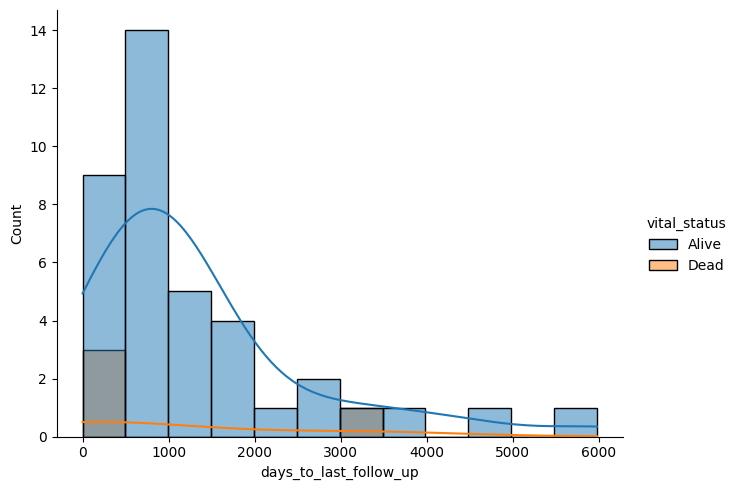

In [ ]:
sns.displot(data=clinical_info_thinned,
            x=clinical_info_thinned['days_to_last_follow_up'],
            legend=True,
            aspect=1.3,
            bins=12,
            hue=clinical_info_thinned['vital_status'],
            kind='hist',
            kde=True)

### year_of_diagnosis

Видимо год поставновки диагноза

Text(0.5, 0, 'year_of_diagnosis')

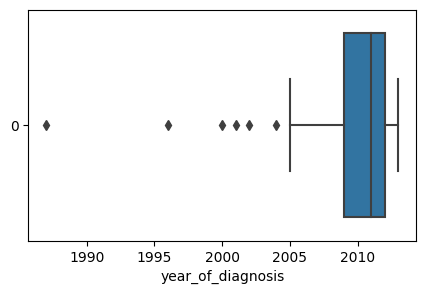

In [ ]:
plt.figure(figsize=(5,3))
sns.boxplot(clinical_info_thinned['year_of_diagnosis'], orient='h')
plt.xlabel('year_of_diagnosis')

In [ ]:
# clinical_info_thinned['year_of_diagnosis'].unique()

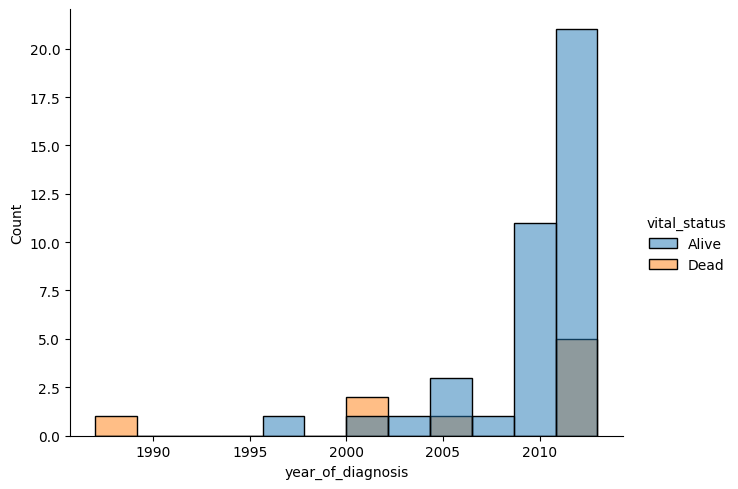

In [ ]:
sns.displot(data=clinical_info_thinned,
            x=clinical_info_thinned['year_of_diagnosis'],
            legend=True,
            aspect=1.3,
            bins=12,
            hue=clinical_info_thinned['vital_status'],
            kind='hist')

### **Матрица корреляции**

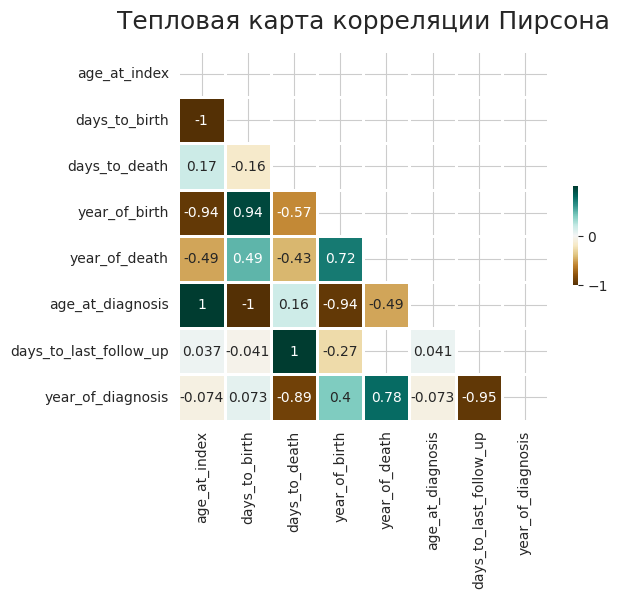

In [ ]:
sns.set_style("whitegrid")

mask = np.triu(np.ones_like(clinical_info_thinned.corr(numeric_only=True), dtype=bool))

heatmap = sns.heatmap(
    clinical_info_thinned.corr(numeric_only=True).round(4),
    annot=True,
    square=True,
    cmap="BrBG",
    cbar_kws={"fraction": 0.01},
    linewidth=1,

    mask=mask,
)

heatmap.set_title(
    "Тепловая карта корреляции Пирсона", fontdict={"fontsize": 18}, pad=16
);

* Очень много возрастных и временных характеристик, многие скоррелированы.
* Отрицательные взаимосвязи между days_of_birth и другими возрастными характеристиками объясняются системой отсчёта. Возможно стоило поменять значения на модуль в этом столбце.
* Год постановки диагноза и количество дней до смерти имеют большую линейную корреляцию. ($-0.89$). Но это объясняется малой выборкой и попаданием в двух экстремальных значений количества дней в нашу выборку.
* На мой взгляд, можно говорить о линейной зависимости между годом постановки диагноза и годом смерти, пусть и достаточно слабой.
* Можно говорить о взаимосвязи года рождения и количества дней до смерти. И года рождения и года смерти.

## Категориальные признаки.

In [ ]:
clinical_info_thinned.describe(include='category')

,case_id,ethnicity,gender,race,vital_status,ann_arbor_b_symptoms,ann_arbor_clinical_stage,ann_arbor_extranodal_involvement,icd_10_code,prior_treatment,site_of_resection_or_biopsy,tissue_or_organ_of_origin,treatment_Radiation,treatment_Pharmaceutical
count,48,48,48,48,48,46,42,46,48,48,48,48,48,48
unique,48,2,2,3,2,2,4,2,10,2,20,20,3,3
top,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,not hispanic or latino,female,white,Alive,No,Stage II,No,C83.3,No,"Lymph nodes of head, face and neck","Lymph nodes of head, face and neck",No,Yes
freq,1,36,26,29,39,35,17,25,38,47,16,16,40,44


In [ ]:
def show_cat_feat(feat, labels=None, title=None, aspect=1, pie=False, h=6, w=4):
    plt.figure(figsize=(h,w))

    print(f'Наличие пропусков: {clinical_info_thinned[feat].isna().any()}')

    if pie:
        clinical_info_thinned[feat].value_counts().plot.pie(autopct = '%1.3f%%', shadow = True,
                                                            # labels=labels
                                                            ).set(title=title)

    sns.displot(data=clinical_info_thinned,
                x=clinical_info_thinned[feat],
                legend=True,
                aspect=aspect,
                hue=clinical_info_thinned['vital_status'],
                kind='hist').set(title=title)

### ethnicity

Этническая принадлежность.

Наличие пропусков: False


<Figure size 600x400 with 0 Axes>

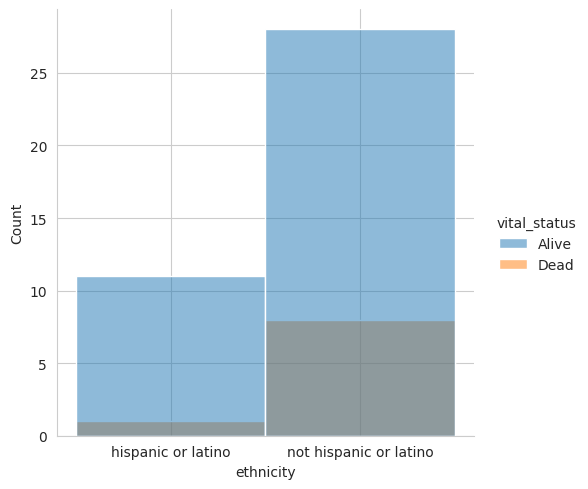

In [ ]:
title = "Этническая принадлежность"

show_cat_feat('ethnicity', title)

### gender

Наличие пропусков: False


<Figure size 600x400 with 0 Axes>

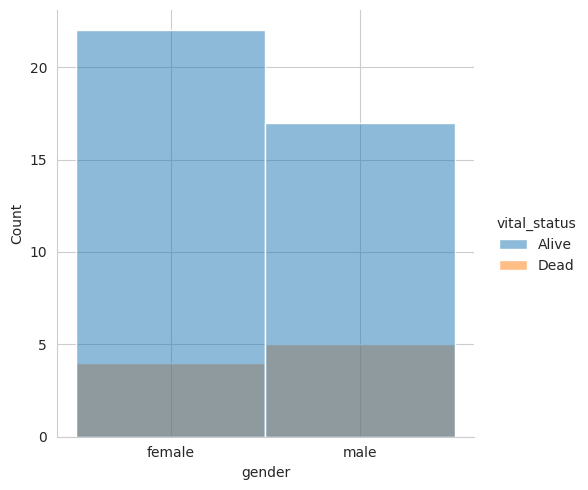

In [ ]:
title = "Гендер"

show_cat_feat('gender', title)

В числах данный параметр:

In [ ]:
temp_ = clinical_info_thinned.groupby(['gender', 'vital_status']).agg(Count=('gender', 'count'))
temp_

Count
gender vital_status       
female Alive            22
       Dead              4
male   Alive            17
       Dead              5

In [ ]:
female_mortality = temp_.loc[('female',  'Dead')][0] / len(clinical_info_thinned)
male_mortality = temp_.loc[('male',  'Dead')][0] / len(clinical_info_thinned)

print(f'Смертность у женщин {round(female_mortality, 3) * 100} ниже, чем смертность мужчин {round(male_mortality, 3) * 100}')

Смертность у женщин 8.3 ниже, чем смертность мужчин 10.4


### race

Наличие пропусков: False


<Figure size 600x400 with 0 Axes>

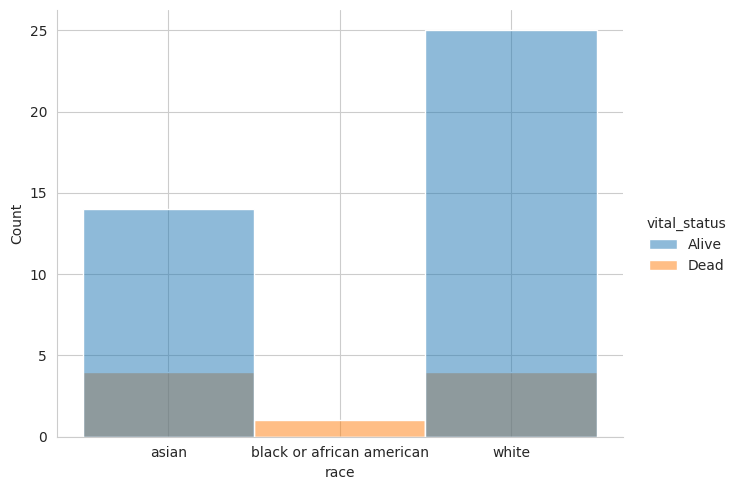

In [ ]:
title = "Раса"

show_cat_feat('race', title, aspect=1.3)

### ann_arbor_b_symptoms

Вероятно наличие симптомов по классификации Анн-Арбора.

Наличие пропусков: True


<Figure size 600x400 with 0 Axes>

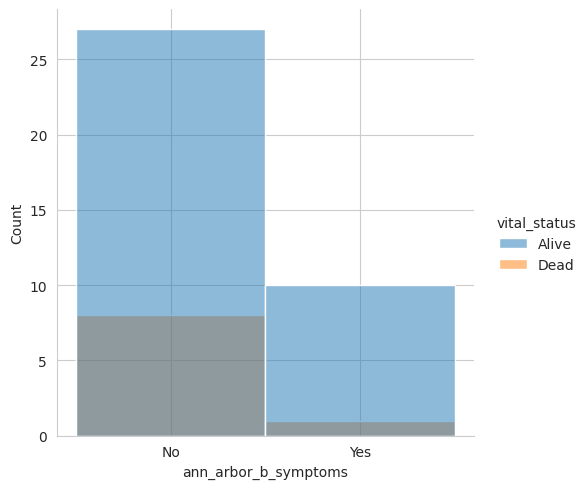

In [ ]:
title = "Наличие симптомов по классификации Анн-Арбора"

show_cat_feat('ann_arbor_b_symptoms', title)

In [ ]:
# sns.catplot(data=clinical_info_thinned, x="vital_status", y="days_to_death", kind="box")

### ann_arbor_clinical_stage

Наличие пропусков: True


<Figure size 1000x800 with 0 Axes>

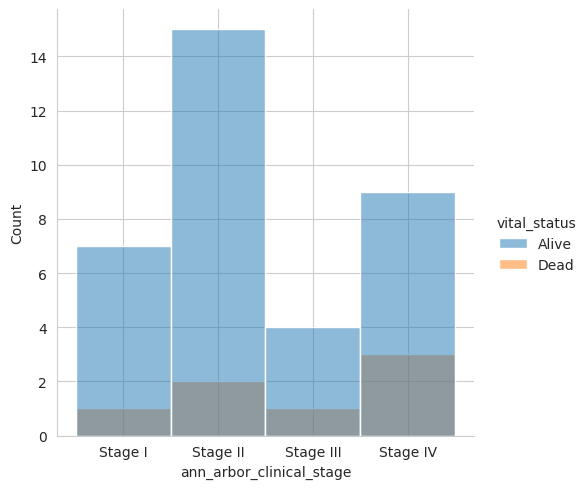

In [ ]:
title = "Клиническая стадия"

show_cat_feat('ann_arbor_clinical_stage', title, h=10, w=8)

Рассмотрим случаи по стадиям и полу с разделением на живых и мёртвых.

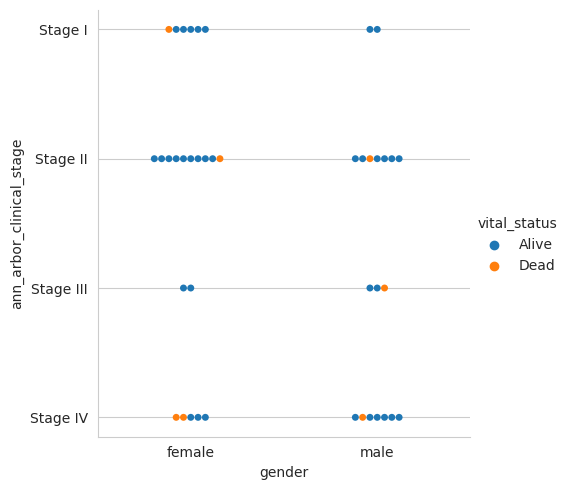

In [ ]:
sns.catplot(data=clinical_info_thinned,
            x="gender",
            y="ann_arbor_clinical_stage",
            hue='vital_status',
            kind="swarm")

В данном случе можно визуально посчитать, и у нас у двоих умерших нет данных о стадии.

In [86]:
clinical_info_thinned[clinical_info_thinned['vital_status'] == 'Dead'][['vital_status','ann_arbor_clinical_stage', 'days_to_death']]

,vital_status,ann_arbor_clinical_stage,days_to_death
0,Dead,Stage I,248.0
2,Dead,NaN,58.0
4,Dead,Stage II,391.0
22,Dead,Stage IV,595.0
28,Dead,NaN,6425.0
42,Dead,Stage IV,1252.0
50,Dead,Stage III,3553.0
52,Dead,Stage II,708.0
86,Dead,Stage IV,313.0


Рассмотрим непрерывную характеристику количество дней до смерти с разрезом по стадии и полу.

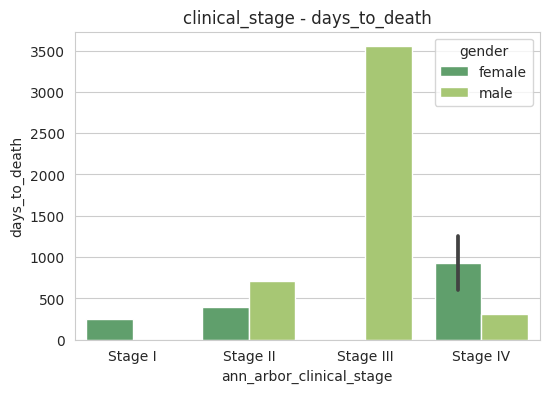

In [ ]:
plt.figure(figsize=(6,4))

sns.barplot(x='ann_arbor_clinical_stage',
            y='days_to_death',
            hue='gender',
            data = clinical_info_thinned,
            palette='summer')
plt.title('clinical_stage - days_to_death')
plt.show();

Несколько неожиданный результат, что количество дней до смерти у людей с третьей стадией в среднем (если вообще есть смысл говорить о среднем на одном человеке) больше, чем у людей с другими стадиями. Но опять же объясняется наличием выбросов. И очень малым количеством умерших людей, попавших в нашу выборку.

### ann_arbor_extranodal_involvement

Наличие пропусков: True


<Figure size 600x400 with 0 Axes>

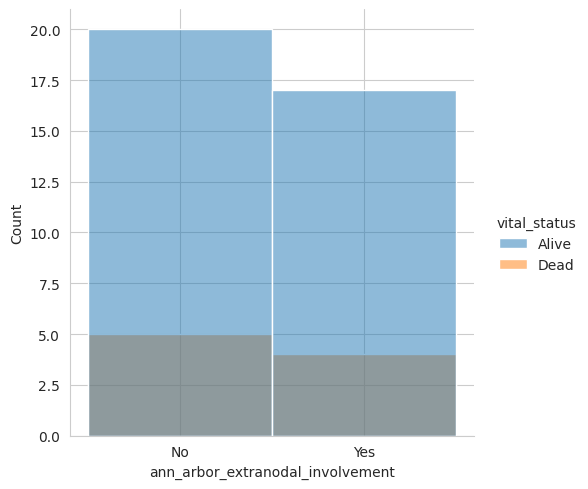

In [ ]:
title = "Экстранодальное поражение"

show_cat_feat('ann_arbor_extranodal_involvement', title)

### icd_10_code

Наличие пропусков: False


<Figure size 600x400 with 0 Axes>

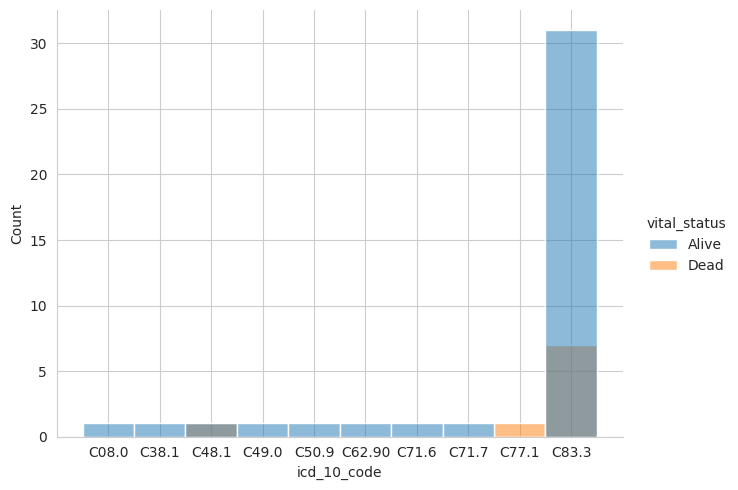

In [ ]:
title = "Кодировка"

show_cat_feat('icd_10_code', title, aspect=1.3)

### prior_treatment

Наличие пропусков: False


<Figure size 600x400 with 0 Axes>

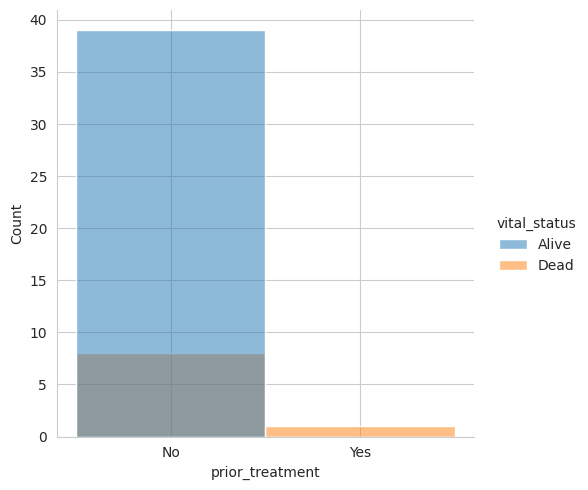

In [ ]:
title = "Предшествующее лечение"

show_cat_feat('prior_treatment', title)

In [ ]:
# sns.catplot(data=clinical_info_thinned, x="prior_treatment", y="days_to_death", hue='vital_status', kind="box")

### site_of_resection_or_biopsy

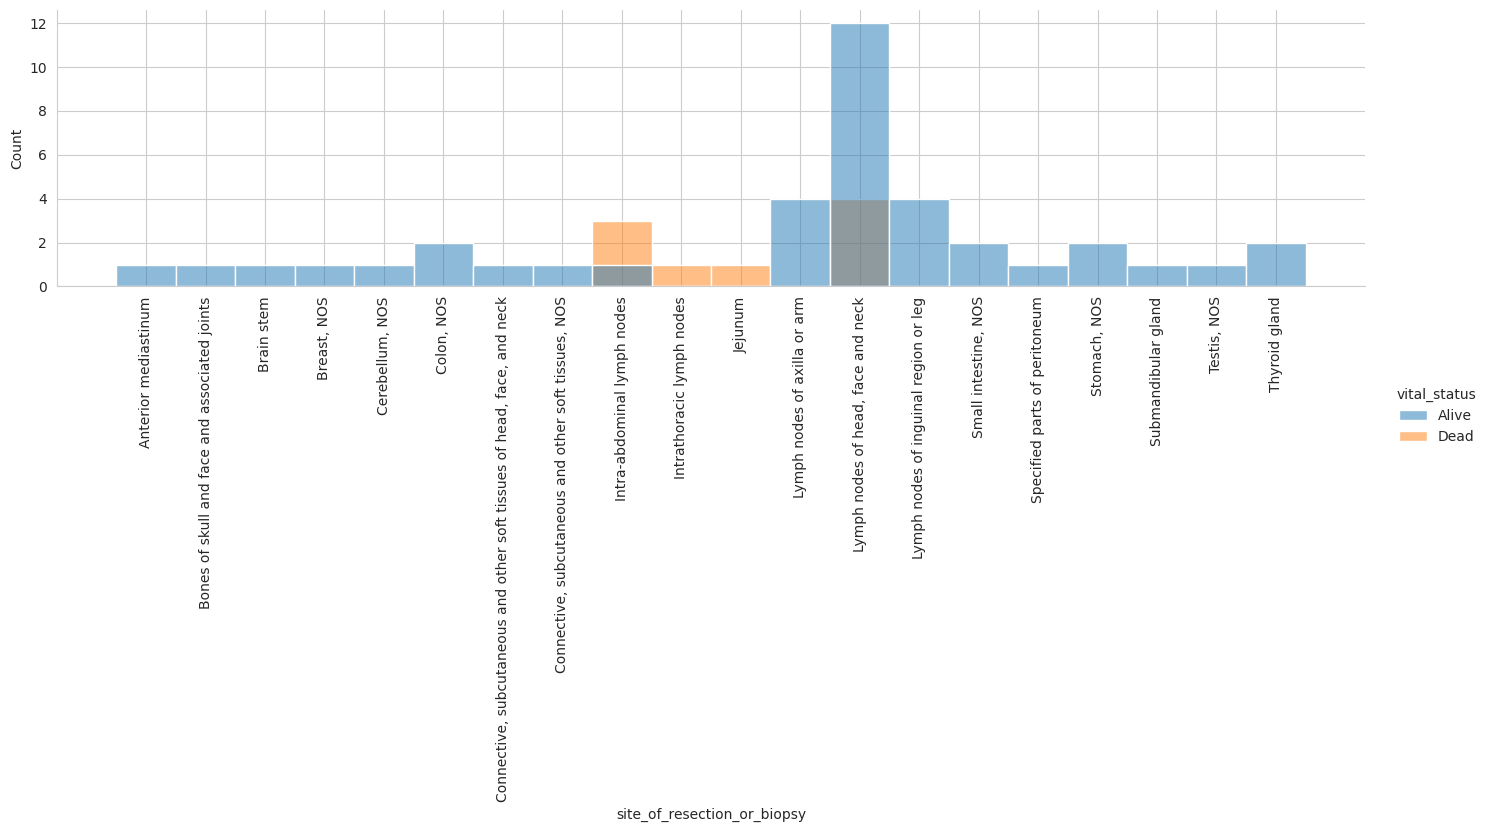

In [ ]:
his = sns.displot(data=clinical_info_thinned,
                x=clinical_info_thinned['site_of_resection_or_biopsy'],
                legend=True,
                height=3.5,
                aspect=4,
                hue=clinical_info_thinned['vital_status'],
                kind='hist')
plt.xticks(rotation=90);
# plt.title('Место резекции или биопсии')

### tissue_or_organ_of_origin

Ткань или орган происхождения. График не показываю, для уменьшения количества. + в разделе меры Крамера можно видеть, что этот признак связан с предыдущим.

In [ ]:
# his = sns.displot(data=clinical_info_thinned,
#                   x=clinical_info_thinned['tissue_or_organ_of_origin'],
#                   legend=True,
#                   height=3.5,
#                   aspect=4,
#                   hue=clinical_info_thinned['vital_status'],
#                   kind='hist')
# plt.xticks(rotation=90);

### treatment_Radiation

Наличие пропусков: False


<Figure size 600x400 with 0 Axes>

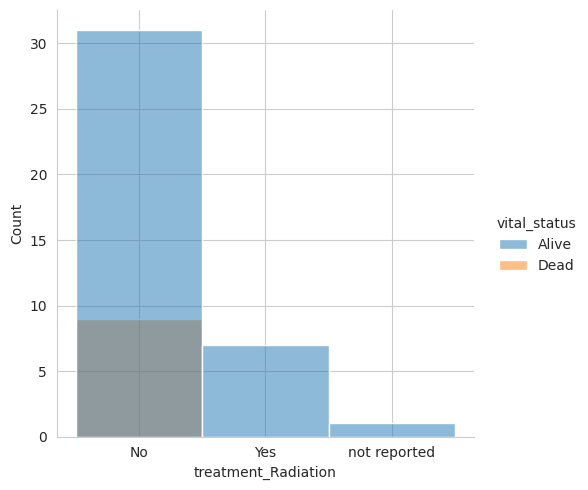

In [ ]:
title = "Лучевая терапия"

show_cat_feat('treatment_Radiation', title, pie=False)

In [ ]:
# sns.catplot(data=clinical_info_thinned, x="treatment_Radiation", y="days_to_death", hue='vital_status', kind="box")

### treatment_Pharmaceutical

Наличие пропусков: False


<Figure size 600x400 with 0 Axes>

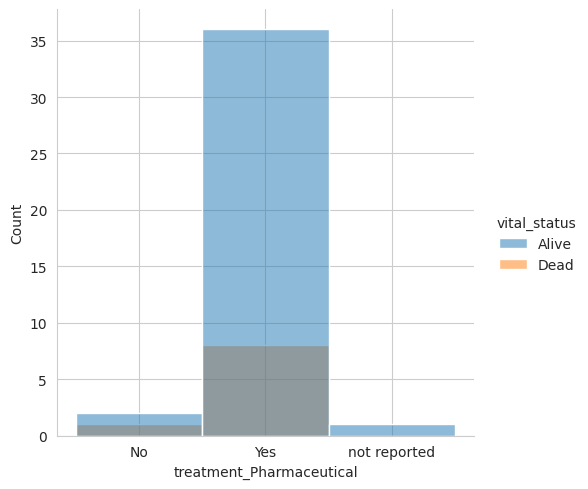

In [ ]:
title = "Фармацевтическое лечение"

show_cat_feat('treatment_Pharmaceutical', title, pie=False)

### **V-мера Крамера**

In [ ]:
cramersv = am.CramersV(clinical_info_thinned[categorical_features].drop('case_id', axis=1))

cramersv.fit()

,ethnicity,gender,race,vital_status,ann_arbor_b_symptoms,ann_arbor_clinical_stage,ann_arbor_extranodal_involvement,icd_10_code,prior_treatment,site_of_resection_or_biopsy,tissue_or_organ_of_origin,treatment_Radiation,treatment_Pharmaceutical
ethnicity,1.000000,0.048280,0.467323,0.154083,0.171909,0.261254,0.377236,0.486664,0.084215,0.786165,0.786165,0.581460,0.096225
gender,0.048280,1.000000,0.139181,0.093734,0.304727,0.253844,0.211429,0.425105,0.158572,0.629963,0.629963,0.159294,0.169138
race,0.467323,0.139181,1.000000,0.320920,0.169315,0.313787,0.162650,0.317215,0.118067,0.601523,0.601523,0.255963,0.090513
vital_status,0.154083,0.093734,0.320920,1.000000,0.148021,0.156914,0.011958,0.388197,0.303642,0.697982,0.697982,0.214834,0.117162
ann_arbor_b_symptoms,0.171909,0.304727,0.169315,0.148021,1.000000,0.579791,0.407044,0.345857,0.265908,0.610514,0.610514,0.257226,0.152696
ann_arbor_clinical_stage,0.261254,0.253844,0.313787,0.156914,0.579791,1.000000,0.493469,0.419426,NaN,0.650678,0.650678,0.247678,0.293057
ann_arbor_extranodal_involvement,0.377236,0.211429,0.162650,0.011958,0.407044,0.493469,1.000000,0.355127,0.162650,0.708284,0.708284,0.211553,0.288195
icd_10_code,0.486664,0.425105,0.317215,0.388197,0.345857,0.419426,0.355127,1.000000,0.074827,0.977824,0.977824,0.284384,0.407393
prior_treatment,0.084215,0.158572,0.118067,0.303642,0.265908,NaN,0.162650,0.074827,1.000000,0.483779,0.483779,0.065233,0.043980
site_of_resection_or_biopsy,0.786165,0.629963,0.601523,0.697982,0.610514,0.650678,0.708284,0.977824,0.483779,1.000000,1.000000,0.815037,0.954455


* Наибольшие меры взаимосвязи между нашей целевой переменной имеют категориальные признаки site_of_resection_or_biopsy и tissue_or_organ_of_origin.
При этом фактически один из этих признаков можно не рассматривать, т.к. между ними полная взаимосвязь.
* Наблюдается взаимосвязь между tissue_or_organ_of_origin (органом или тканью происхожднея) и полом.
* Возможно стоит отметить связь между тканью и этнической принадлежностью.

## vital_status

Выбранная мной целевая переменная.

[Text(0.5, 1.0, 'Жизненное состояние')]

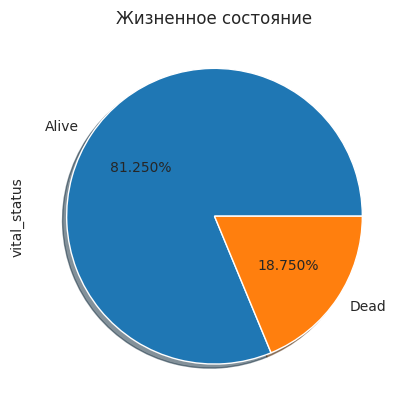

In [ ]:
title = 'Жизненное состояние'

clinical_info_thinned['vital_status'].value_counts().plot.pie(autopct = '%1.3f%%', shadow=True,
                                                            # labels=labels
                                                            ).set(title=title)

Общие выводы: датасет слишком мал, чтобы делать какие-то выводы насчёт связи признаков в выбранной целевой переменной.

# Дополнительно

## Phik матрица

In [ ]:
import phik
from phik.report import plot_correlation_matrix

interval columns not set, guessing: ['age_at_index', 'days_to_birth', 'days_to_death', 'year_of_birth', 'year_of_death', 'age_at_diagnosis', 'days_to_last_follow_up', 'year_of_diagnosis']


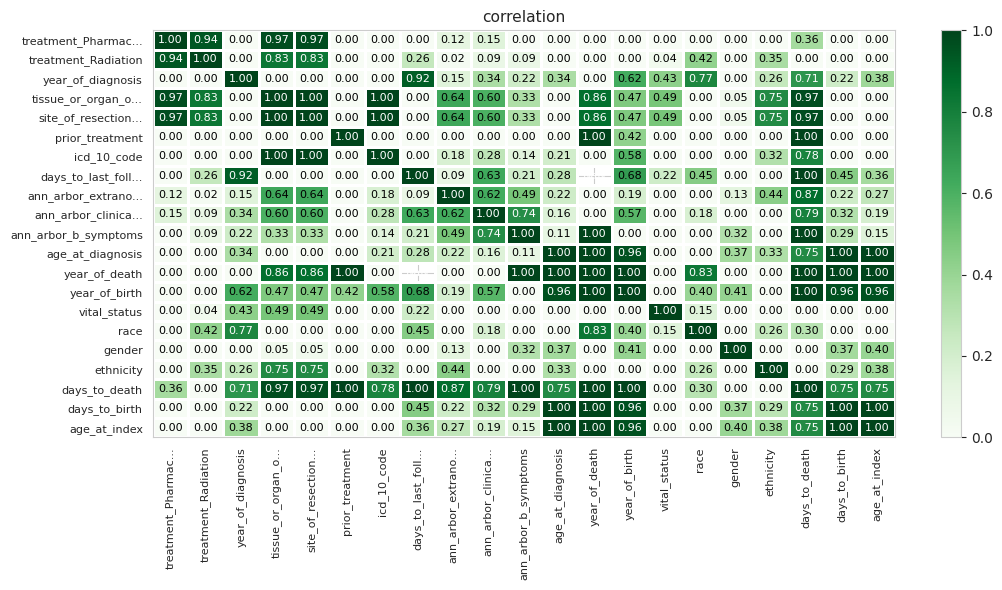

In [ ]:
phik_overview = clinical_info_thinned.drop('case_id', axis=1).phik_matrix().round(2)

phik.report.plot_correlation_matrix(phik_overview.values,
                        x_labels=phik_overview.columns,
                        y_labels=phik_overview.index,
                        vmin=0, vmax=1, color_map="Greens",
                        title=r"correlation",
                        fontsize_factor=0.8, figsize=(11, 6))
# plt.tight_layout()

Метод позволяется вычислять взаимосвязи между различными типами признаков (категориальными, непрерывными и их комбинациями). 1 - максимальная взаимосвязь. 0 - нулевая.

Выбранная целевая переменная по данному методу имеет хоть какую-то взаимосвязь с year_of_diagnosis и tissue_or_organ_of_origin.

## ANOVA

Попробуем рассмотреть связь между числовыми - категориальными признаками. В частности, с целевой переменной.

In [ ]:
from scipy.stats import f_oneway

In [ ]:
Data = []
# пробегаем по колонкам и для всех категориальных признаков будем группировать значения
for c1 in clinical_info_thinned.columns:
    for c2 in clinical_info_thinned.columns:
        if clinical_info_thinned[c1].dtype == 'category' and clinical_info_thinned[c2].dtype != 'category':
            CategoryGroupLists = clinical_info_thinned.groupby(c1)[c2].apply(list)
            AnovaResults = f_oneway(*CategoryGroupLists) #f-test

            if AnovaResults[1] >= 0.05:
                Data.append({'Category' : c1, 'Numerical' : c2, 'Is correlated' : 'No'})
            else:
                Data.append({'Category' : c1, 'Numerical' : c2, 'Is correlated' : 'Yes'})

AnovaRes = pd.DataFrame.from_dict(Data)
AnovaRes[AnovaRes['Category'] == 'vital_status']

,Category,Numerical,Is correlated
32,vital_status,age_at_index,No
33,vital_status,days_to_birth,No
34,vital_status,days_to_death,Yes
35,vital_status,year_of_birth,No
36,vital_status,year_of_death,Yes
37,vital_status,age_at_diagnosis,No
38,vital_status,days_to_last_follow_up,Yes
39,vital_status,year_of_diagnosis,No


По методике ANOVA для нашей vital_status есть взаимосвязь с days_of_death, year_of_depth, days_to_last_follow_up.

Этот результат кажется более интуитивно верным по сравнению c phik матрицей.